
---

**Problem Statement:**

This project aims to conduct a comprehensive analysis of flight delays in the aviation industry by comparing data from the year 2009 with 2018. Using the dataset sourced from Kaggle's [Airline Delay and Cancellation Data (2009-2018)](https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018/data), stored in the 'content/data' folder, the analysis focuses on the two files named "2009" and "2018." PySpark will be leveraged for efficient processing of the large-scale CSV data. The study will explore various aspects of flight delays, cancellations, and patterns over nearly a decade, utilizing diverse machine learning techniques to extract meaningful insights. The comparative analysis will focus on factors such as seasonality, geographical influences, airline performance, and other operational variables, providing a data-driven perspective on how the aviation industry has evolved in terms of punctuality and reliability.

---



# DATASET Description
https://github.com/Shiv162003/Big_data/tree/main/Dataset

# General Features

- **FL_DATE**: Indicates the date of the flight departure.
- **OP_CARRIER**: Denotes the operating carrier or airline for the flight.
- **OP_CARRIER_FL_NUM**: Represents the flight number assigned by the operating carrier.
- **ORIGIN**: Specifies the departure airport code or location.
- **DEST**: Indicates the destination airport code or location.
- **CANCELLED**: An indicator for whether the flight was canceled.
- **DIVERTED**: An indicator for whether the flight was diverted to a different destination.

---

## Departure Features

- **CRS_DEP_TIME**: Represents the scheduled departure time of the flight.
- **DEP_TIME**: Indicates the actual departure time of the flight.
- **DEP_DELAY**: Represents the delay in departure time, if any.
- **TAXI_OUT**: Denotes the time spent taxiing out before takeoff.
- **WHEELS_OFF**: Indicates the time at which the aircraft wheels leave the ground for takeoff.

---

## In-Flight Features

- **TAXI_IN**: Denotes the time spent taxiing in after landing.
- **CRS_ELAPSED_TIME**: Represents the scheduled elapsed time of the flight.
- **ACTUAL_ELAPSED_TIME**: Indicates the actual elapsed time of the flight.
- **AIR_TIME**: Denotes the time spent in the air during the flight.
- **DISTANCE**: Indicates the distance traveled by the flight.

---

## Arrival Features

- **CRS_ARR_TIME**: Represents the scheduled arrival time of the flight.
- **ARR_TIME**: Indicates the actual arrival time of the flight.
- **ARR_DELAY**: Denotes the delay in arrival time, if any.
- **WHEELS_ON**: Indicates the time at which the aircraft wheels make contact with the ground upon landing.

---

## Delay Features

- **CARRIER_DELAY**: Denotes the delay attributed to the carrier or airline.
- **WEATHER_DELAY**: Represents the delay attributed to weather conditions.
- **NAS_DELAY**: Denotes the delay attributed to the National Airspace System (NAS).
- **SECURITY_DELAY**: Indicates the delay attributed to security-related issues.
- **LATE_AIRCRAFT_DELAY**: Denotes the delay attributed to issues with the aircraft being late.

---

In [2]:
# all the required libraries and dependencies
!pip install pyspark
from pyspark.sql import SparkSession




In [13]:
#LOADING THE DATASET
# Initialize Spark session
spark = SparkSession.builder.appName("FlightDelayAnalysis").getOrCreate()

# Load the CSV files into DataFrames
df1 = spark.read.csv('/content/data/2009.csv', header=True, inferSchema=True)
df2 = spark.read.csv('/content/2017.csv', header=True, inferSchema=True)

# Show a preview of the data
df1.show(5)
df2.show(5)

+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|   FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|

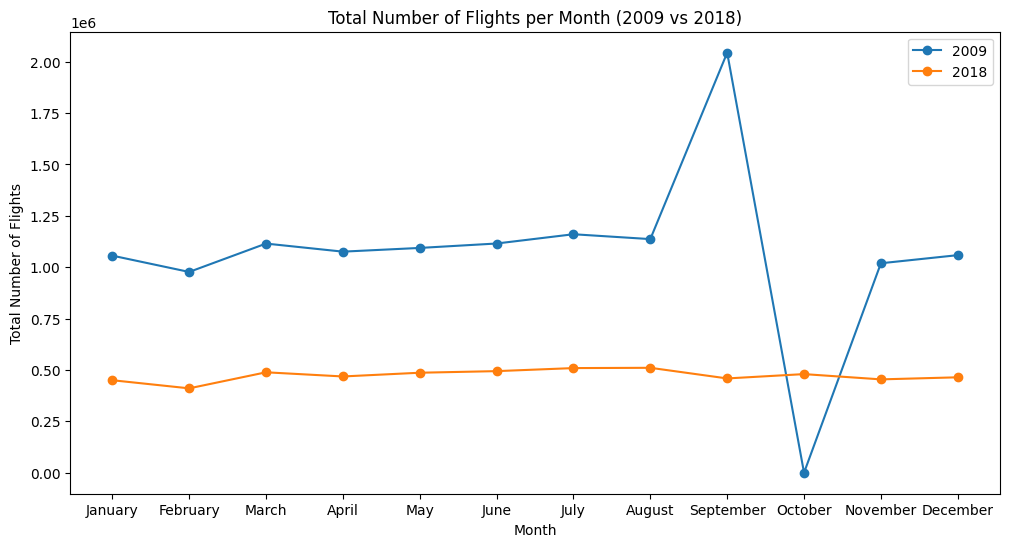

In [14]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, month, year
import calendar

# Extract year and month from FL_DATE
df1 = df1.withColumn("Year", year(col("FL_DATE"))).withColumn("Month", month(col("FL_DATE")))
df2 = df2.withColumn("Year", year(col("FL_DATE"))).withColumn("Month", month(col("FL_DATE")))

# Group by month and count the total flights
df1_monthly = df1.groupBy("Month").count().orderBy("Month")
df2_monthly = df2.groupBy("Month").count().orderBy("Month")

# Collect the results into Pandas DataFrames for plotting
df1_monthly_pd = df1_monthly.toPandas()
df2_monthly_pd = df2_monthly.toPandas()

# Map month numbers to month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Plot the total number of flights for each month (January to December) for both 2009 and 2018
plt.figure(figsize=(12, 6))


plt.plot(df1_monthly_pd['Month'], df1_monthly_pd['count'], label='2009', marker='o')


plt.plot(df2_monthly_pd['Month'], df2_monthly_pd['count'], label='2018', marker='o')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Total Number of Flights')
plt.title('Total Number of Flights per Month (2009 vs 2018)')
plt.legend()
plt.xticks(range(1, 13), month_names)  # Use month names as x-axis labels

# Show the plot
plt.show()


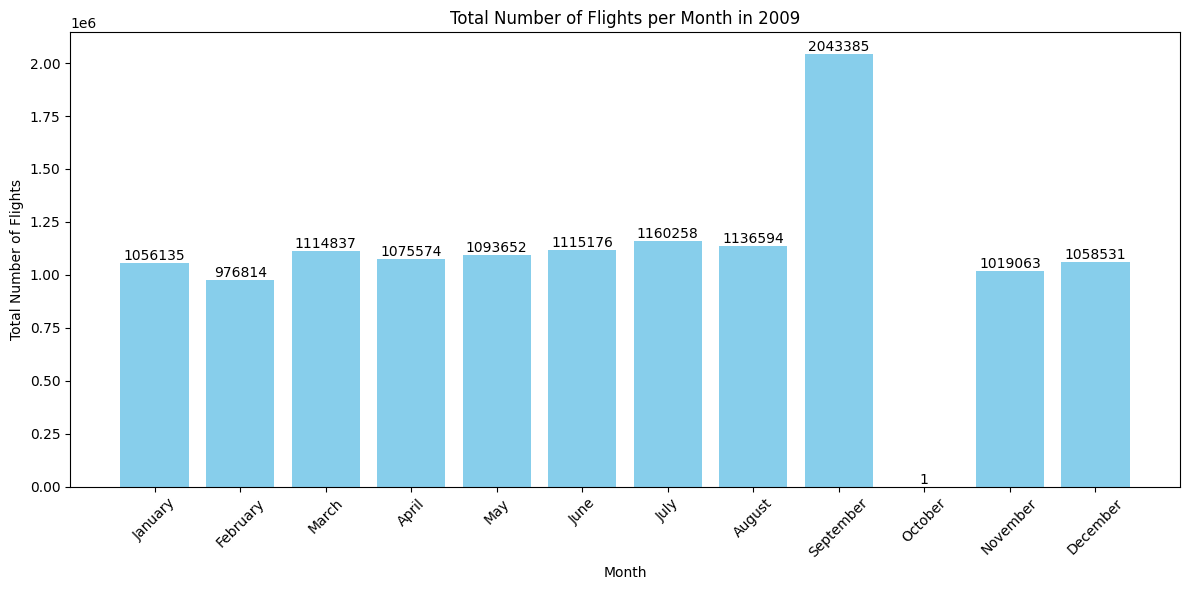

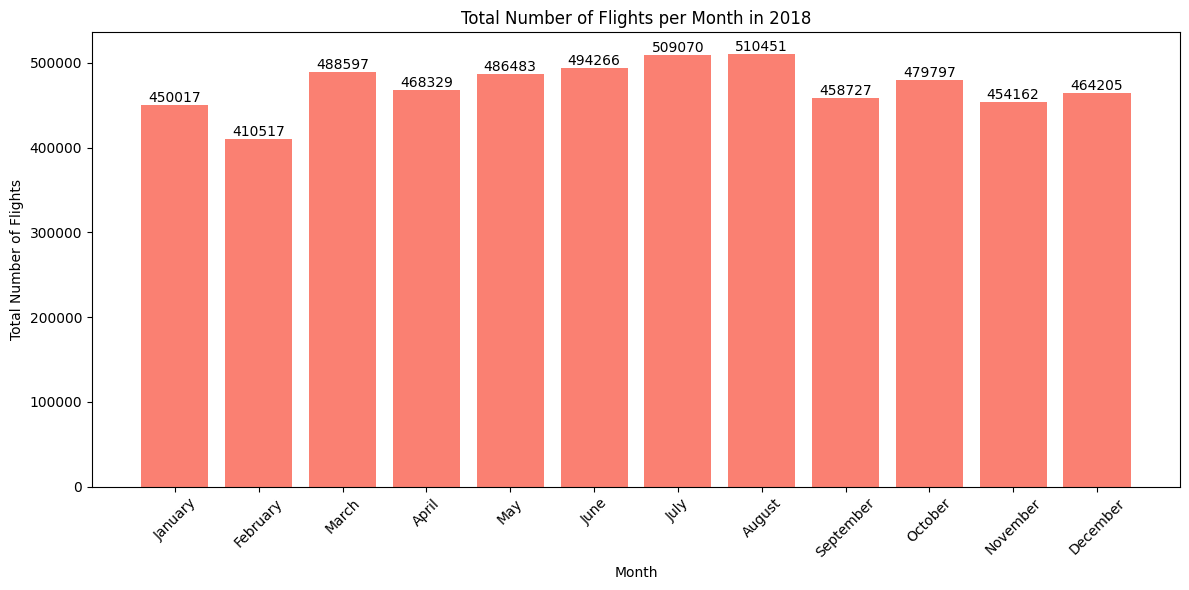

In [15]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, month, year
import calendar

# Extract year and month from FL_DATE
df1 = df1.withColumn("Year", year(col("FL_DATE"))).withColumn("Month", month(col("FL_DATE")))
df2 = df2.withColumn("Year", year(col("FL_DATE"))).withColumn("Month", month(col("FL_DATE")))

# Group by month and count the total flights
df1_monthly = df1.groupBy("Month").count().orderBy("Month")
df2_monthly = df2.groupBy("Month").count().orderBy("Month")

# Collect the results into Pandas DataFrames for plotting
df1_monthly_pd = df1_monthly.toPandas()
df2_monthly_pd = df2_monthly.toPandas()

# Map month numbers to month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Plotting for 2009
plt.figure(figsize=(12, 6))
bars_2009 = plt.bar(df1_monthly_pd['Month'], df1_monthly_pd['count'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Number of Flights')
plt.title('Total Number of Flights per Month in 2009')
plt.xticks(range(1, 13), month_names, rotation=45)

# Add the flight count values above each bar for 2009
for bar in bars_2009:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plotting for 2018
plt.figure(figsize=(12, 6))
bars_2018 = plt.bar(df2_monthly_pd['Month'], df2_monthly_pd['count'], color='salmon')
plt.xlabel('Month')
plt.ylabel('Total Number of Flights')
plt.title('Total Number of Flights per Month in 2018')
plt.xticks(range(1, 13), month_names, rotation=45)

# Add the flight count values above each bar for 2018
for bar in bars_2018:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [16]:
from pyspark.sql.functions import abs, avg

# Take the absolute value of ARR_DELAY for both datasets
df1 = df1.withColumn("ARR_DELAY_ABS", abs(col("ARR_DELAY")))
df2 = df2.withColumn("ARR_DELAY_ABS", abs(col("ARR_DELAY")))

# Calculate the average of the absolute ARR_DELAY for 2009
avg_arr_delay_2009 = df1.select(avg("ARR_DELAY_ABS")).collect()[0][0]

# Calculate the average of the absolute ARR_DELAY for 2018
avg_arr_delay_2018 = df2.select(avg("ARR_DELAY_ABS")).collect()[0][0]

# Print the results
print(f"Average Absolute Arrival Delay in 2009: {avg_arr_delay_2009:.2f} minutes")
print(f"Average Absolute Arrival Delay in 2018: {avg_arr_delay_2018:.2f} minutes")


Average Absolute Arrival Delay in 2009: 18.26 minutes
Average Absolute Arrival Delay in 2018: 21.34 minutes


In [20]:
from pyspark.sql import functions as F

# Function to get top 10 carriers for each dataset
def get_top_carriers(df, year):
    # Group by carrier and count the number of flights
    carriers_flight_count_df = df.groupBy(F.col('OP_CARRIER')).count().orderBy(F.col('count').desc())

    # Get top 10 carriers
    top_10 = carriers_flight_count_df.limit(10).toPandas()

    # Rename column for better readability
    top_10 = top_10.rename(columns={'OP_CARRIER': 'Carrier', 'count': 'Flight Count'})

    # Add a year column for identification
    top_10['Year'] = year

    return top_10

# Get top 10 carriers for 2009
top_10_2009 = get_top_carriers(df1, 2009)

# Get top 10 carriers for 2018
top_10_2018 = get_top_carriers(df2, 2018)

# Combine both top 10 dataframes for comparison
top_carriers_combined = pd.concat([top_10_2009, top_10_2018])

# Display the combined top 10 carriers data
top_carriers_combined


,Carrier,Flight Count,Year
0,WN,2255157,2009
1,AA,1100092,2009
2,OO,1091076,2009
3,MQ,871331,2009
4,DL,852067,2009
5,US,822818,2009
6,UA,751534,2009
7,XE,617964,2009
8,EV,596883,2009
9,NW,584702,2009


In [21]:
top_10_2009

,Carrier,Flight Count,Year
0,WN,2255157,2009
1,AA,1100092,2009
2,OO,1091076,2009
3,MQ,871331,2009
4,DL,852067,2009
5,US,822818,2009
6,UA,751534,2009
7,XE,617964,2009
8,EV,596883,2009
9,NW,584702,2009


In [22]:
top_10_2018

,Carrier,Flight Count,Year
0,WN,1329444,2018
1,DL,923560,2018
2,AA,896348,2018
3,OO,706527,2018
4,UA,584481,2018
5,EV,339541,2018
6,B6,298654,2018
7,AS,185068,2018
8,NK,156818,2018
9,F9,103027,2018


In [24]:
import altair as alt
import pandas as pd

# Function to create pie chart for top carriers
def create_pie_chart(data, year):
    # Creating the pie chart using Altair
    chart = alt.Chart(data).mark_arc(outerRadius=260, innerRadius=75).encode(
        theta=alt.Theta(field="Flight Count", type="quantitative", stack=True),
        color=alt.Color('Carrier:N', scale=alt.Scale(scheme='category20'), legend=None),
    ).properties(
        title=f'Top 10 Carriers by Amount of Flights in {year}',
        width=500,
        height=200
    )

    # Add value text on the pie chart
    value_text = chart.mark_text(radius=300, size=15).encode(
        text=alt.Text('Flight Count:Q')
    )

    # Add carrier name text on the pie chart
    text = chart.mark_text(radius=200, size=15).encode(
        text=alt.Text('Carrier:N'),
        color=alt.value("#000000")
    )

    # Combine the chart and text
    return chart + text + value_text

# Create pie charts for both 2009 and 2018
pie_2009 = create_pie_chart(top_10_2009, 2009)
pie_2018 = create_pie_chart(top_10_2018, 2018)

# Display both pie charts side by side
pie_2009 | pie_2018


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)